# Table of Contents

1. [Imports](#1)
2. [Preparing the dataset for Modeling](#2)
3. [Supervised Learning](#3)
4. [Unsupervised Learning](#4)

<a id='1'></a>
## Imports

In [1]:
try:
    import catboost
except:
    !pip install catboost
    import catboost

try:
    import xgboost
except:
    !pip install xgboost
    import xgboost

try:
    import lightgbm
except:
    !pip install lightgbm
    import lightgbm

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'c:\\Users\\JUAQUIN\\Desktop\\Joaquin\\DSAIS\\Principles and Elementary Models\\Group 7 Work\\Notebook'

<a id='2'></a>
## Preparing the dataset for Modeling

In [4]:
data = pd.read_csv('../data/cleaned_dataset.csv')
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,energyEfficiencyClass,lastRefurbish
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,10.0,840.0,1965.0,1.0,oil,False,True,2.0,595.0,86.00,well_kept,normal,negotiable,Schüruferstraße,False,4,ground_floor,44269,4,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,NO_INFORMATION,neverRefurbished
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,10.0,648.0,1950.0,2.0,gas,False,False,1.0,800.0,89.00,refurbished,normal,no,Undisclosed,False,5,ground_floor,67459,3,107.0,2.0,3.0,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NO_INFORMATION,2019.0
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.4,1300.0,2019.0,1.0,gas,False,True,9.0,965.0,83.80,first_time_use,sophisticated,negotiable,Turnerweg,True,6,apartment,1097,3,107.0,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,NO_INFORMATION,neverRefurbished
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,40.0,648.0,1964.0,0.0,district_heating,False,False,2.0,343.0,58.15,well_kept,normal,negotiable,Glück-Auf-Straße,False,2,other,9599,3,86.0,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,NO_INFORMATION,neverRefurbished
4,Bremen,138.00,self_contained_central_heating,NONE,False,True,40.0,903.0,1950.0,0.0,gas,False,False,1.0,765.0,84.97,refurbished,normal,negotiable,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3,188.9,1.0,3.0,3,False,4,Bremen,Neu_Schwachhausen,NO_INFORMATION,neverRefurbished


In [5]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen',
       'cellar', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'streetPlain', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'regio2', 'regio3', 'energyEfficiencyClass', 'lastRefurbish'],
      dtype='object')

In [6]:
# Drop the columns 'serviceCharge', 'baseRent', and 'baseRentRange' as they are the addends for the 'totalRent' we're trying to predict
data = data.drop(columns = {'serviceCharge', 'baseRent', 'baseRentRange'})

In [7]:
# save a copy of the original data without the columns 'serviceCharge', 'baseRent', and 'baseRentRange'
df = data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   regio1                 253973 non-null  object 
 1   heatingType            253973 non-null  object 
 2   telekomTvOffer         253973 non-null  object 
 3   newlyConst             253973 non-null  bool   
 4   balcony                253973 non-null  bool   
 5   telekomUploadSpeed     253973 non-null  float64
 6   totalRent              253973 non-null  float64
 7   yearConstructed        253973 non-null  float64
 8   noParkSpaces           253973 non-null  float64
 9   firingTypes            253973 non-null  object 
 10  hasKitchen             253973 non-null  bool   
 11  cellar                 253973 non-null  bool   
 12  yearConstructedRange   253973 non-null  float64
 13  livingSpace            253973 non-null  float64
 14  condition              253973 non-nu

In [9]:
# save as variables the names of the numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_vars = data.select_dtypes(include=['object']).columns.tolist()
cat_vars

['regio1',
 'heatingType',
 'telekomTvOffer',
 'firingTypes',
 'condition',
 'interiorQual',
 'petsAllowed',
 'streetPlain',
 'typeOfFlat',
 'regio2',
 'regio3',
 'energyEfficiencyClass',
 'lastRefurbish']

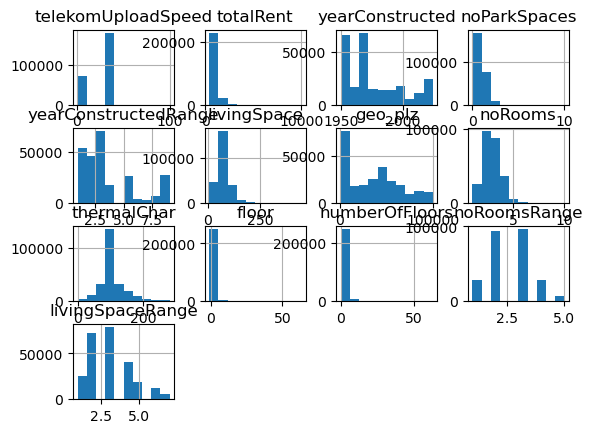

In [10]:
# plot histograms of quantitative columns
df[num_cols].hist()
plt.show()

From the histograms we can see the distribution of each variable. 
- totalRent, noParkSpace and livingSpace are right-skewed, which could potentially create difficulties to the algorithm in understanding the data.  
- thermalChar and noRooms are bell shaped

In [11]:
# Create a new dataset to apply the transformations
df = data.copy()

In [12]:
data[cat_vars].nunique()

regio1                      16
heatingType                 14
telekomTvOffer               3
firingTypes                 22
condition                   10
interiorQual                 3
petsAllowed                  3
streetPlain              53233
typeOfFlat                  10
regio2                     419
regio3                    8495
energyEfficiencyClass       10
lastRefurbish               69
dtype: int64

The first step in preparing the dataset for the analysis is dealing with categorical variables. As the categorical columns have different amounts of unique values, we divide them based on the cardinality: above 30 unique values, the columns will be encoded using LabelEncoder. For the rest of the cases, get_dummies will be applied. In case of an intrinsic order in the data, the modification will be manually applied

In [13]:
# Split the categorical variables according to the cardinality
cat_vars_low = [col for col in cat_vars if data[col].nunique() <= 30]
cat_vars_high = [col for col in cat_vars if data[col].nunique() > 30]

In [14]:
cat_vars_low

['regio1',
 'heatingType',
 'telekomTvOffer',
 'firingTypes',
 'condition',
 'interiorQual',
 'petsAllowed',
 'typeOfFlat',
 'energyEfficiencyClass']

In [15]:
cat_vars_high

['streetPlain', 'regio2', 'regio3', 'lastRefurbish']

In [16]:
# Encode the variables according to the cardinality (below 30 unique values == Dummy)
encoder = LabelEncoder()

# Encoding variables with high cardinality with LabelEncoder
for col in cat_vars_high:
    data[col] = encoder.fit_transform(data[col])

# Encoding variables with low cardinality with get_dummies()
data = pd.get_dummies(data, columns = cat_vars_low, dtype=float, drop_first= True)
data.head()

,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,hasKitchen,cellar,yearConstructedRange,livingSpace,streetPlain,lift,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,lastRefurbish,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,firingTypes_coal,firingTypes_coal_coke,firingTypes_district_heating,firingTypes_electricity,firingTypes_environmental_thermal_energy,firingTypes_gas,firingTypes_geothermal,firingTypes_heat_supply,firingTypes_hydro_energy,firingTypes_liquid_gas,firingTypes_local_heating,firingTypes_multiple,firingTypes_natural_gas_heavy,firingTypes_natural_gas_light,firingTypes_oil,firingTypes_pellet_heating,firingTypes_solar_heating,firingTypes_steam_district_heating,firingTypes_wind_energy,firingTypes_wood,firingTypes_wood_chips,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_normal,interiorQual_sophisticated,petsAllowed_no,petsAllowed_yes,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,energyEfficiencyClass_A_PLUS,energyEfficiencyClass_B,energyEfficiencyClass_C,energyEfficiencyClass_D,energyEfficiencyClass_E,energyEfficiencyClass_F,energyEfficiencyClass_G,energyEfficiencyClass_H,energyEfficiencyClass_NO_INFORMATION
0,False,False,10.0,840.0,1965.0,1.0,False,True,2.0,86.00,43535,False,44269,4,181.4,1.0,3.0,4,True,4,79,6822,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,True,10.0,648.0,1950.0,2.0,False,False,1.0,89.00,47731,False,67459,3,107.0,2.0,3.0,3,False,4,311,1173,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,True,True,2.4,1300.0,2019.0,1.0,False,True,9.0,83.80,47429,True,1097,3,107.0,3.0,4.0,3,False,4,80,8474,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,False,True,40.0,648.0,1964.0,0.0,False,False,2.0,58.15,17511,False,9599,3,86.0,3.0,3.0,3,False,2,230,2134,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [17]:
# Scale numerical variables using StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head(3)

,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,hasKitchen,cellar,yearConstructedRange,livingSpace,streetPlain,lift,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,lastRefurbish,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,firingTypes_coal,firingTypes_coal_coke,firingTypes_district_heating,firingTypes_electricity,firingTypes_environmental_thermal_energy,firingTypes_gas,firingTypes_geothermal,firingTypes_heat_supply,firingTypes_hydro_energy,firingTypes_liquid_gas,firingTypes_local_heating,firingTypes_multiple,firingTypes_natural_gas_heavy,firingTypes_natural_gas_light,firingTypes_oil,firingTypes_pellet_heating,firingTypes_solar_heating,firingTypes_steam_district_heating,firingTypes_wind_energy,firingTypes_wood,firingTypes_wood_chips,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_normal,interiorQual_sophisticated,petsAllowed_no,petsAllowed_yes,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,energyEfficiencyClass_A_PLUS,energyEfficiencyClass_B,energyEfficiencyClass_C,energyEfficiencyClass_D,energyEfficiencyClass_E,energyEfficiencyClass_F,energyEfficiencyClass_G,energyEfficiencyClass_H,energyEfficiencyClass_NO_INFORMATION
0,False,False,-1.266475,0.088478,-0.507395,0.777027,False,True,-0.632130,0.398036,43535,False,0.267891,1.378868,1.749650,-0.661998,-0.206925,1.526185,True,0.663371,79,6822,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,True,-1.266475,-0.289668,-1.182753,2.089635,False,False,-1.035067,0.493068,47731,False,1.105675,0.370267,-0.102289,-0.055557,-0.206925,0.454869,False,0.663371,311,1173,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,True,True,-1.746962,0.994453,1.923895,0.777027,False,True,2.188430,0.328346,47429,True,-1.291781,0.370267,-0.102289,0.550883,0.379640,0.454869,False,0.663371,80,8474,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id='3'></a>
# Supervised Learning

Our goal is to predict totalRent values.

In [18]:
X = data.drop(columns = 'totalRent')

# target variable
y = data['totalRent']

In [19]:
X.head(2)

,newlyConst,balcony,telekomUploadSpeed,yearConstructed,noParkSpaces,hasKitchen,cellar,yearConstructedRange,livingSpace,streetPlain,lift,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,lastRefurbish,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,firingTypes_coal,firingTypes_coal_coke,firingTypes_district_heating,firingTypes_electricity,firingTypes_environmental_thermal_energy,firingTypes_gas,firingTypes_geothermal,firingTypes_heat_supply,firingTypes_hydro_energy,firingTypes_liquid_gas,firingTypes_local_heating,firingTypes_multiple,firingTypes_natural_gas_heavy,firingTypes_natural_gas_light,firingTypes_oil,firingTypes_pellet_heating,firingTypes_solar_heating,firingTypes_steam_district_heating,firingTypes_wind_energy,firingTypes_wood,firingTypes_wood_chips,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_normal,interiorQual_sophisticated,petsAllowed_no,petsAllowed_yes,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,energyEfficiencyClass_A_PLUS,energyEfficiencyClass_B,energyEfficiencyClass_C,energyEfficiencyClass_D,energyEfficiencyClass_E,energyEfficiencyClass_F,energyEfficiencyClass_G,energyEfficiencyClass_H,energyEfficiencyClass_NO_INFORMATION
0,False,False,-1.266475,-0.507395,0.777027,False,True,-0.632130,0.398036,43535,False,0.267891,1.378868,1.749650,-0.661998,-0.206925,1.526185,True,0.663371,79,6822,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,True,-1.266475,-1.182753,2.089635,False,False,-1.035067,0.493068,47731,False,1.105675,0.370267,-0.102289,-0.055557,-0.206925,0.454869,False,0.663371,311,1173,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Split the data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((203178, 104), (50795, 104), (203178,), (50795,))

## Modeling

We first iterate through a list of several models (linear models, tree-based models and ensemble learning models) and see their prediction scores.

In [22]:
# defining the models 

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f'{name} Performance:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}')
    print('-' * 30)

Linear Regression Performance:
MAE: 0.36
MSE: 0.40
RMSE: 0.63
R²: 0.61
------------------------------
Ridge Regression Performance:
MAE: 0.36
MSE: 0.40
RMSE: 0.63
R²: 0.61
------------------------------
Lasso Regression Performance:
MAE: 0.65
MSE: 1.02
RMSE: 1.01
R²: 0.01
------------------------------
KNeighbors Regressor Performance:
MAE: 0.45
MSE: 0.61
RMSE: 0.78
R²: 0.41
------------------------------
Decision Tree Performance:
MAE: 0.32
MSE: 0.46
RMSE: 0.68
R²: 0.56
------------------------------
Random Forest Performance:
MAE: 0.24
MSE: 0.24
RMSE: 0.49
R²: 0.77
------------------------------
Gradient Boosting Regressor Performance:
MAE: 0.30
MSE: 0.31
RMSE: 0.56
R²: 0.70
------------------------------


Since GradientBoosting is performing fairly well, we tried implementing additional ensemble models and see how they predict

In [23]:
# XGBRegressor 
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

# train the XGBRegressor model and predict the outcome values
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# performance metrics for XGBRegressor
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print('XGBoost Performance:')
print(f'MAE: {mae_xgb:.2f}')
print(f'MSE: {mse_xgb:.2f}')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'R²: {r2_xgb:.2f}')

XGBoost Performance:
MAE: 0.26
MSE: 0.25
RMSE: 0.50
R²: 0.76


In [24]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# performance metrics for Light Gradient Boosting Machine
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print('LightGBM Performance:')
print(f'MAE: {mae_lgbm:.2f}')
print(f'MSE: {mse_lgbm:.2f}')
print(f'RMSE: {rmse_lgbm:.2f}')
print(f'R²: {r2_lgbm:.2f}')
print('-' * 30)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1936
[LightGBM] [Info] Number of data points in the train set: 203178, number of used features: 101
[LightGBM] [Info] Start training from score -0.002098
LightGBM Performance:
MAE: 0.27
MSE: 0.26
RMSE: 0.51
R²: 0.75
------------------------------


In [25]:
# CatBoost model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

# performance metrics for CatBoost
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
r2_catboost = r2_score(y_test, y_pred_catboost)

print('CatBoost Performance:')
print(f'MAE: {mae_catboost:.2f}')
print(f'MSE: {mse_catboost:.2f}')
print(f'RMSE: {rmse_catboost:.2f}')
print(f'R²: {r2_catboost:.2f}')
print('-' * 30)

CatBoost Performance:
MAE: 0.25
MSE: 0.24
RMSE: 0.49
R²: 0.77
------------------------------


The best performing models out of the previous ones are RandomForestRegressor and CatBoost (with XGBRegressor and LGBMRegressor also yielding fairly good results). 

To check which model better understands the data, we need to see whether it overfits or not by printing the scores of the prediction on the train set. 

In [26]:
## Best model - RandomForestRegressor
best_rf = RandomForestRegressor()
best_rf.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# test the performance of the model on the test set

best_y_pred = best_rf.predict(X_test)

# performance metrics
mae_best = mean_absolute_error(y_test, best_y_pred)
mse_best = mean_squared_error(y_test, best_y_pred)
rmse_best = np.sqrt(mean_squared_error(y_test, best_y_pred))
r2_best = r2_score(y_test, best_y_pred)

print('RandomForestRegressor Performance:')
print(f'MAE: {mae_best:.2f}')
print(f'MSE: {mse_best:.2f}')
print(f'RMSE: {rmse_best:.2f}')
print(f'R²: {r2_best:.2f}')

RandomForestRegressor Performance:
MAE: 0.24
MSE: 0.24
RMSE: 0.49
R²: 0.77


In [28]:
# test the performance of the model on the train set to check if it overfits
y_train_prediction = best_rf.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_prediction)
mse_train = mean_squared_error(y_train, y_train_prediction)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_prediction)

print('RandomForestRegressor Performance on training set:')
print(f"Training MAE: {mae_train:.2f}")
print(f"Training MSE: {mse_train:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training R²: {r2_train:.2f}")


RandomForestRegressor Performance on training set:
Training MAE: 0.09
Training MSE: 0.03
Training RMSE: 0.19
Training R²: 0.97


The results clearly indicate that the prediction performance on the training set, compared to the test set, is much higher (respectively 0.96 and 0.77). Therefore, the model overfits.

We tried testing the second best performing model (CatBoostRegressor) to see whether it overfits less the data.

In [29]:
## Best model 2 - CatBoostRegressor
best_cb = CatBoostRegressor()
best_cb.fit(X_train, y_train)

Learning rate set to 0.094803
0:	learn: 0.9492767	total: 36ms	remaining: 36s
1:	learn: 0.9077152	total: 68.9ms	remaining: 34.4s
2:	learn: 0.8708080	total: 98.2ms	remaining: 32.6s
3:	learn: 0.8390651	total: 138ms	remaining: 34.3s
4:	learn: 0.8112155	total: 167ms	remaining: 33.1s
5:	learn: 0.7863067	total: 194ms	remaining: 32.2s
6:	learn: 0.7652966	total: 222ms	remaining: 31.5s
7:	learn: 0.7442557	total: 250ms	remaining: 31s
8:	learn: 0.7275936	total: 280ms	remaining: 30.8s
9:	learn: 0.7127301	total: 326ms	remaining: 32.3s
10:	learn: 0.6995154	total: 354ms	remaining: 31.8s
11:	learn: 0.6878462	total: 382ms	remaining: 31.4s
12:	learn: 0.6750774	total: 412ms	remaining: 31.2s
13:	learn: 0.6658320	total: 439ms	remaining: 30.9s
14:	learn: 0.6578120	total: 466ms	remaining: 30.6s
15:	learn: 0.6486095	total: 493ms	remaining: 30.3s
16:	learn: 0.6411088	total: 521ms	remaining: 30.1s
17:	learn: 0.6351941	total: 550ms	remaining: 30s
18:	learn: 0.6301439	total: 592ms	remaining: 30.6s
19:	learn: 0.622

In [30]:
# test the performance of the model on the test set
best_y_cb = best_cb.predict(X_test)

# performance metrics
mae_best_cb = mean_absolute_error(y_test, best_y_cb)
mse_best_cb = mean_squared_error(y_test, best_y_cb)
rmse_best_cb = np.sqrt(mean_squared_error(y_test, best_y_cb))
r2_best_cb = r2_score(y_test, best_y_cb)

print('CatBoostRegressor Performance:')
print(f'MAE: {mae_best_cb:.2f}')
print(f'MSE: {mse_best_cb:.2f}')
print(f'RMSE: {rmse_best_cb:.2f}')
print(f'R²: {r2_best_cb:.2f}')

CatBoostRegressor Performance:
MAE: 0.25
MSE: 0.24
RMSE: 0.49
R²: 0.77


In [31]:
# test the performance of the model on the train set to check if it overfits
y_train_cb = best_cb.predict(X_train)

mae_train_cb = mean_absolute_error(y_train, y_train_cb)
mse_train_cb = mean_squared_error(y_train, y_train_cb)
rmse_train_cb = np.sqrt(mse_train_cb)
r2_train_cb = r2_score(y_train, y_train_cb)

print('CatBoostRegressor Performance on training set:')
print(f"Training MAE: {mae_train_cb:.2f}")
print(f"Training MSE: {mse_train_cb:.2f}")
print(f"Training RMSE: {rmse_train_cb:.2f}")
print(f"Training R²: {r2_train_cb:.2f}")

CatBoostRegressor Performance on training set:
Training MAE: 0.24
Training MSE: 0.18
Training RMSE: 0.43
Training R²: 0.82


The CatBoostRegressor overfits less compared to the RandomForestRegressor, therefore it's been chosen as the best model.

After having chosen the best model, we tuned the hyperparameters with RandomizedSearchCV.

In [32]:
# Hyperparameters tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'depth': [4, 6, 8, 9, 10, 12],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [3, 5, 7],  
}

grid_search = RandomizedSearchCV(estimator=best_cb, param_distributions=param_dist, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
grid_search.fit(X_train, y_train)

0:	learn: 0.9403657	total: 173ms	remaining: 1m 26s
1:	learn: 0.8905973	total: 337ms	remaining: 1m 23s
2:	learn: 0.8451906	total: 501ms	remaining: 1m 22s
3:	learn: 0.8063630	total: 668ms	remaining: 1m 22s
4:	learn: 0.7749010	total: 837ms	remaining: 1m 22s
5:	learn: 0.7450000	total: 990ms	remaining: 1m 21s
6:	learn: 0.7188125	total: 1.15s	remaining: 1m 20s
7:	learn: 0.6960218	total: 1.3s	remaining: 1m 20s
8:	learn: 0.6763286	total: 1.46s	remaining: 1m 19s
9:	learn: 0.6599478	total: 1.62s	remaining: 1m 19s
10:	learn: 0.6439435	total: 1.77s	remaining: 1m 18s
11:	learn: 0.6314964	total: 1.95s	remaining: 1m 19s
12:	learn: 0.6200469	total: 2.17s	remaining: 1m 21s
13:	learn: 0.6088613	total: 2.33s	remaining: 1m 21s
14:	learn: 0.5995714	total: 2.52s	remaining: 1m 21s
15:	learn: 0.5914726	total: 2.67s	remaining: 1m 20s
16:	learn: 0.5842513	total: 2.83s	remaining: 1m 20s
17:	learn: 0.5777503	total: 2.99s	remaining: 1m 20s
18:	learn: 0.5727240	total: 3.15s	remaining: 1m 19s
19:	learn: 0.5678576	to

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000018254095AC0>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8, 9, 10, 12],
                                        'iterations': [100, 200, 500],
                                        'l2_leaf_reg': [3, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [33]:
# print the best parameters found by the RandomizedSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 12}
Best Score (Negative MSE): -0.23391634606655284


In [34]:
# train the CatBoostRegressor with the hyperparameters found by RandomizedSearchCV
mod = CatBoostRegressor(learning_rate = 0.1, l2_leaf_reg = 5 ,iterations = 500, depth=12)
mod.fit(X_train, y_train)

0:	learn: 0.9403657	total: 149ms	remaining: 1m 14s
1:	learn: 0.8905973	total: 314ms	remaining: 1m 18s
2:	learn: 0.8451906	total: 490ms	remaining: 1m 21s
3:	learn: 0.8063630	total: 659ms	remaining: 1m 21s
4:	learn: 0.7749010	total: 820ms	remaining: 1m 21s
5:	learn: 0.7450000	total: 972ms	remaining: 1m 20s
6:	learn: 0.7188125	total: 1.13s	remaining: 1m 19s
7:	learn: 0.6960218	total: 1.3s	remaining: 1m 19s
8:	learn: 0.6763286	total: 1.46s	remaining: 1m 19s
9:	learn: 0.6599478	total: 1.63s	remaining: 1m 19s
10:	learn: 0.6439435	total: 1.79s	remaining: 1m 19s
11:	learn: 0.6314964	total: 1.96s	remaining: 1m 19s
12:	learn: 0.6200469	total: 2.1s	remaining: 1m 18s
13:	learn: 0.6088613	total: 2.25s	remaining: 1m 18s
14:	learn: 0.5995714	total: 2.41s	remaining: 1m 18s
15:	learn: 0.5914726	total: 2.58s	remaining: 1m 18s
16:	learn: 0.5842513	total: 2.74s	remaining: 1m 17s
17:	learn: 0.5777503	total: 2.9s	remaining: 1m 17s
18:	learn: 0.5727240	total: 3.08s	remaining: 1m 17s
19:	learn: 0.5678576	tota

In [35]:
# evaluate the performance of the model on the test set to check the improvements
y_mod = mod.predict(X_test)

# performance metrics
mae_mod = mean_absolute_error(y_test, y_mod)
mse_mod = mean_squared_error(y_test, y_mod)
rmse_mod = np.sqrt(mean_squared_error(y_test, y_mod))
r2_mod = r2_score(y_test, y_mod)

print('RandomForestRegressor Performance:')
print(f'MAE: {mae_mod:.2f}')
print(f'MSE: {mse_mod:.2f}')
print(f'RMSE: {rmse_mod:.2f}')
print(f'R²: {r2_mod:.2f}')

RandomForestRegressor Performance:
MAE: 0.24
MSE: 0.22
RMSE: 0.47
R²: 0.79


#### Residuals Analysis

After estabilishing the best model for regression, we examine the residuals. 
They are an indicator of how well the model accuracy and they are able to highlight potential problems or inshghts on the model's ability to capture the pattern of the data. 

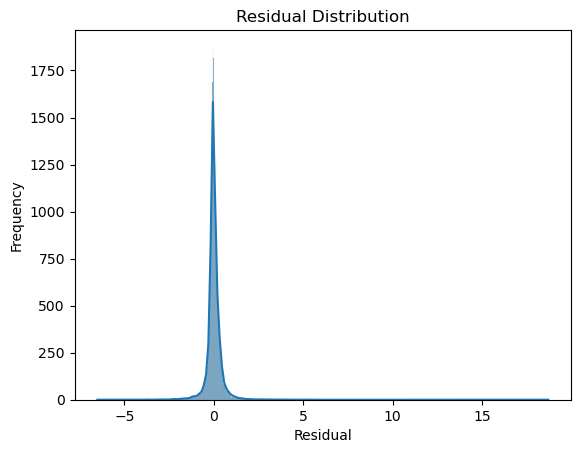

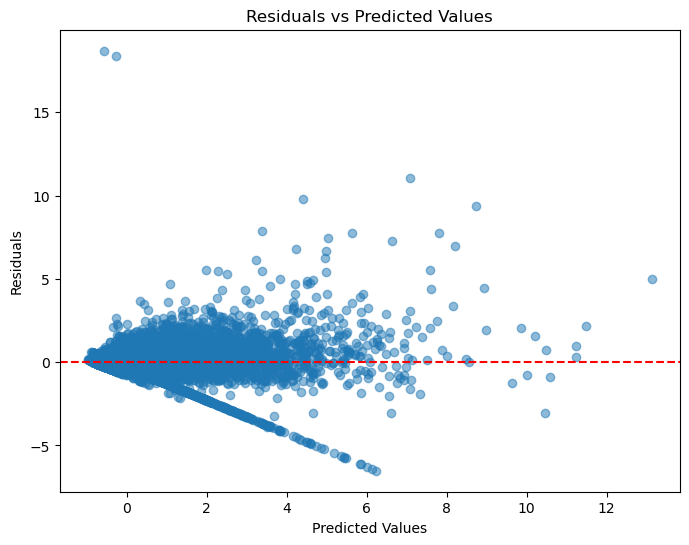

In [36]:
# residuals analysis
residuals = y_test - y_mod

# residual distribution
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_mod, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The residuals graph show that they have a normal distribution, with mean round 0. 
The second graph visualises the residuals against the predicted values. As we can see, the data has a light funnel-shape, highlighting the presence of heteroskedasticity in the residuals. 

The residuals near the lower predicted values (close to 0) are more concentrated and less spread compared to higher predicted values, which indicates that the model performs better for lower predictions but struggles as the predicted values increase in value. 
Additionally, the results are concentrated around 0, which suggests that the model is on average unbiased, however, as residuals increase, the model might be over- or under-estimating certain ranges of predicted values. 

<Axes: >

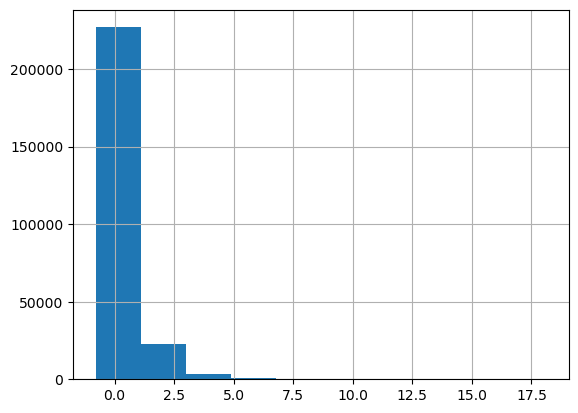

In [37]:
y.hist()

One potential solution to address the issue is to adjust the distribution of the target feature. As observed from the graph, the dependent variable shows a slight right-skewed distribution. By taking the log, the target variable can be made more symmetrical and closer to a normal distribution. 

In [38]:
y_log = np.log1p(y)

In [39]:
# Split the now log dependent variable
y_log_train, y_log_test = train_test_split(y_log, train_size=0.8, random_state=42)

In [40]:
y_log.isnull().sum()

0

In [41]:
# train and test the tuned CatBoost model on log target variable
mod.fit(X_train, y_log_train)
y_mod_log = mod.predict(X_test)

# performance metrics
mae_mod = mean_absolute_error(y_log_test, y_mod_log)
mse_mod = mean_squared_error(y_log_test, y_mod_log)
rmse_mod = np.sqrt(mean_squared_error(y_log_test, y_mod_log))
r2_mod = r2_score(y_log_test, y_mod_log)

print('RandomForestRegressor Performance:')
print(f'MAE: {mae_mod:.2f}')
print(f'MSE: {mse_mod:.2f}')
print(f'RMSE: {rmse_mod:.2f}')
print(f'R²: {r2_mod:.2f}')

0:	learn: 0.7528230	total: 169ms	remaining: 1m 24s
1:	learn: 0.7072901	total: 346ms	remaining: 1m 26s
2:	learn: 0.6678165	total: 521ms	remaining: 1m 26s
3:	learn: 0.6338191	total: 709ms	remaining: 1m 27s
4:	learn: 0.6045855	total: 907ms	remaining: 1m 29s
5:	learn: 0.5789745	total: 1.09s	remaining: 1m 29s
6:	learn: 0.5563613	total: 1.27s	remaining: 1m 29s
7:	learn: 0.5362042	total: 1.45s	remaining: 1m 28s
8:	learn: 0.5195107	total: 1.62s	remaining: 1m 28s
9:	learn: 0.5043062	total: 1.78s	remaining: 1m 27s
10:	learn: 0.4908235	total: 1.98s	remaining: 1m 28s
11:	learn: 0.4791781	total: 2.15s	remaining: 1m 27s
12:	learn: 0.4695806	total: 2.33s	remaining: 1m 27s
13:	learn: 0.4610438	total: 2.52s	remaining: 1m 27s
14:	learn: 0.4531907	total: 2.7s	remaining: 1m 27s
15:	learn: 0.4468958	total: 2.88s	remaining: 1m 27s
16:	learn: 0.4408021	total: 3.07s	remaining: 1m 27s
17:	learn: 0.4359077	total: 3.25s	remaining: 1m 27s
18:	learn: 0.4318284	total: 3.43s	remaining: 1m 26s
19:	learn: 0.4276676	to

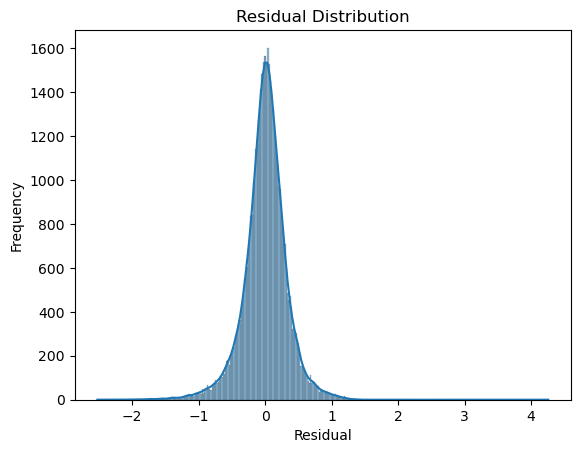

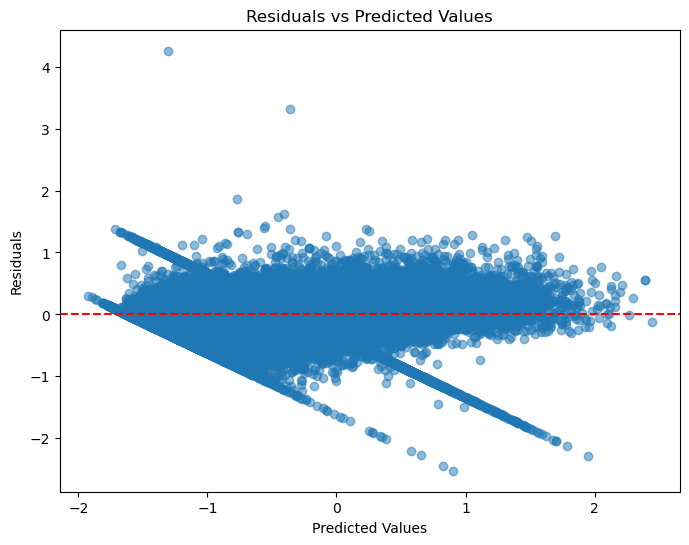

In [42]:
# residuals analysis
residuals_log = y_log_test - y_mod_log

# residual distribution
sns.histplot(residuals_log, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_mod_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The distribution of the residuals (after taking the log) seems to be more centered around the horizontal zero line, which indicates less bias in prediction. 
However, there are still two diagonal lines which indicate that there are still systematic patterns in the data that the model cannot fully capture. 

#### Feature Importance Analysis

In [43]:
# get feature importance
feature_importance = mod.get_feature_importance()
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # sort by importance 

importance_df

,Feature,Importance
11,geo_plz,21.294023
8,livingSpace,16.338532
19,regio2,8.844303
18,livingSpaceRange,4.361386
23,regio1_Berlin,3.286785
...,...,...
68,firingTypes_solar_heating,0.000000
60,firingTypes_hydro_energy,0.000000
100,energyEfficiencyClass_F,0.000000
102,energyEfficiencyClass_H,0.000000


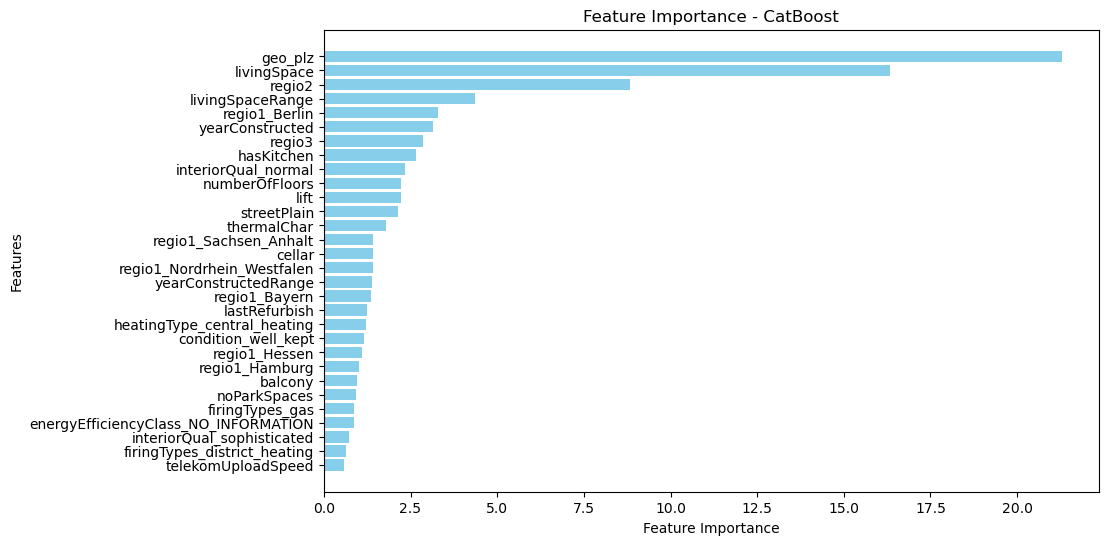

In [44]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(30), importance_df['Importance'].head(30), color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - CatBoost')
plt.gca().invert_yaxis()  # Flip the order
plt.show()

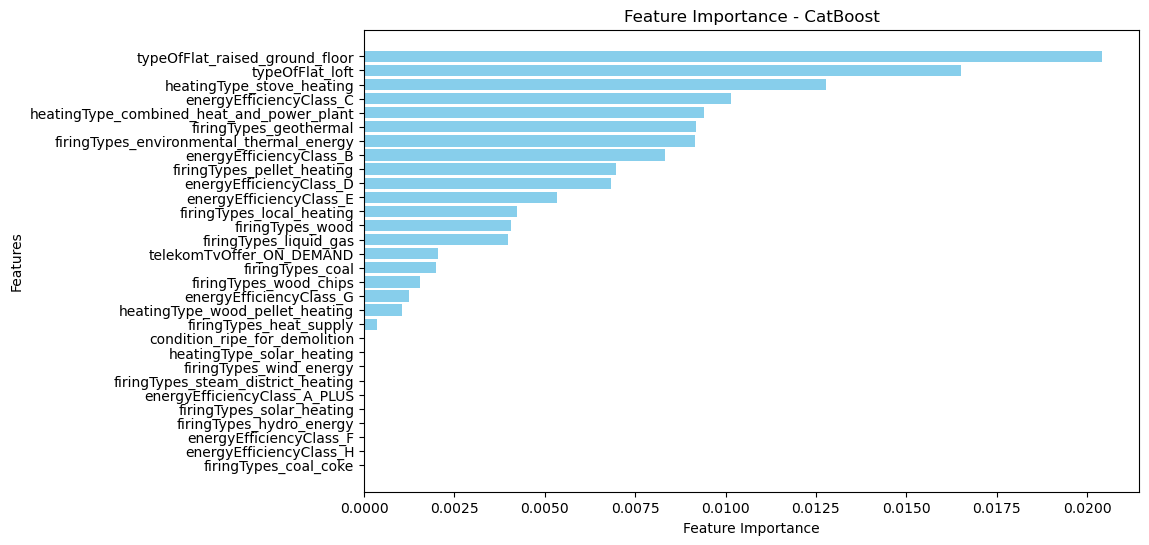

In [45]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].tail(30), importance_df['Importance'].tail(30), color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - CatBoost')
plt.gca().invert_yaxis()  # Flip the order
plt.show()

We can see that the most important features are'livingSpace' being at the top of the list, as well as geographic features such as geo_plz, regio2, and regio1 (encoded in the different columns). 
One way to use this information is to try and use only the most correlated variables in our analysis: energy efficiency class, firing types, heating type 

In [46]:
X_features = X.copy()
columns_to_remove = [
    col for col in X_features.columns 
    if col.startswith('firingTypes') or col.startswith('energyEfficiencyClass') or col.startswith('heatingType')
]

X_features = X_features.drop(columns=columns_to_remove)

In [47]:
X_feat_train, X_feat_test = train_test_split(X_features, train_size=0.8, random_state=42)
mod.fit(X_feat_train, y_log_train)

y_mod_feat = mod.predict(X_feat_test)

# performance metrics
mae_mod_feat = mean_absolute_error(y_log_test, y_mod_feat)
mse_mod_feat = mean_squared_error(y_log_test, y_mod_feat)
rmse_mod_feat = np.sqrt(mean_squared_error(y_log_test, y_mod_feat))
r2_mod_feat = r2_score(y_log_test, y_mod_feat)

print('RandomForestRegressor Performance:')
print(f'MAE: {mae_mod_feat:.2f}')
print(f'MSE: {mse_mod_feat:.2f}')
print(f'RMSE: {rmse_mod_feat:.2f}')
print(f'R²: {r2_mod_feat:.2f}')

0:	learn: 0.7526081	total: 192ms	remaining: 1m 35s
1:	learn: 0.7071743	total: 421ms	remaining: 1m 44s
2:	learn: 0.6676894	total: 682ms	remaining: 1m 53s
3:	learn: 0.6328351	total: 994ms	remaining: 2m 3s
4:	learn: 0.6033035	total: 1.27s	remaining: 2m 5s
5:	learn: 0.5779331	total: 1.55s	remaining: 2m 7s
6:	learn: 0.5541490	total: 1.82s	remaining: 2m 8s
7:	learn: 0.5343081	total: 2.11s	remaining: 2m 9s
8:	learn: 0.5167298	total: 2.4s	remaining: 2m 10s
9:	learn: 0.5023797	total: 2.72s	remaining: 2m 13s
10:	learn: 0.4892853	total: 2.99s	remaining: 2m 12s
11:	learn: 0.4777755	total: 3.33s	remaining: 2m 15s
12:	learn: 0.4671332	total: 3.6s	remaining: 2m 15s
13:	learn: 0.4590669	total: 3.88s	remaining: 2m 14s
14:	learn: 0.4521442	total: 4.15s	remaining: 2m 14s
15:	learn: 0.4462686	total: 4.42s	remaining: 2m 13s
16:	learn: 0.4404174	total: 4.64s	remaining: 2m 11s
17:	learn: 0.4354913	total: 4.83s	remaining: 2m 9s
18:	learn: 0.4304164	total: 5s	remaining: 2m 6s
19:	learn: 0.4263734	total: 5.17s	

In [48]:
param_dist = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10, 12, 14],
    'l2_leaf_reg': [1, 3, 5],
}

random_search2 = RandomizedSearchCV(estimator=mod, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=10)
random_search2.fit(X_feat_train, y_train)

print("Best Parameters from RandomizedSearchCV:", random_search2.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.9389111	total: 346ms	remaining: 2m 52s
1:	learn: 0.8863370	total: 728ms	remaining: 3m 1s
2:	learn: 0.8416023	total: 1.11s	remaining: 3m 4s
3:	learn: 0.8025220	total: 1.49s	remaining: 3m 5s
4:	learn: 0.7684177	total: 1.88s	remaining: 3m 6s
5:	learn: 0.7386354	total: 2.28s	remaining: 3m 7s
6:	learn: 0.7113872	total: 2.67s	remaining: 3m 7s
7:	learn: 0.6880211	total: 3.05s	remaining: 3m 7s
8:	learn: 0.6670207	total: 3.44s	remaining: 3m 7s
9:	learn: 0.6492545	total: 3.84s	remaining: 3m 8s
10:	learn: 0.6325274	total: 4.23s	remaining: 3m 8s
11:	learn: 0.6188490	total: 4.61s	remaining: 3m 7s
12:	learn: 0.6062648	total: 4.99s	remaining: 3m 6s
13:	learn: 0.5956080	total: 5.36s	remaining: 3m 6s
14:	learn: 0.5848869	total: 5.74s	remaining: 3m 5s
15:	learn: 0.5764016	total: 6.13s	remaining: 3m 5s
16:	learn: 0.5684507	total: 6.51s	remaining: 3m 4s
17:	learn: 0.5609158	total: 6.89s	remaining: 3m 4s
18:	learn: 0.5546244	total: 7.

In [49]:
best_model_random = random_search2.best_estimator_
best_model_random.fit(X_feat_train, y_train)

y_mod_feat2 = best_model_random.predict(X_feat_test)

# performance metrics
mae_mod_feat = mean_absolute_error(y_test, y_mod_feat2)
mse_mod_feat = mean_squared_error(y_test, y_mod_feat2)
rmse_mod_feat = np.sqrt(mean_squared_error(y_test, y_mod_feat2))
r2_mod_feat = r2_score(y_test, y_mod_feat2)

print('RandomForestRegressor Performance:')
print(f'MAE: {mae_mod_feat:.2f}')
print(f'MSE: {mse_mod_feat:.2f}')
print(f'RMSE: {rmse_mod_feat:.2f}')
print(f'R²: {r2_mod_feat:.2f}')

0:	learn: 0.9389111	total: 389ms	remaining: 3m 14s
1:	learn: 0.8863370	total: 950ms	remaining: 3m 56s
2:	learn: 0.8416023	total: 1.38s	remaining: 3m 47s
3:	learn: 0.8025220	total: 1.79s	remaining: 3m 41s
4:	learn: 0.7684177	total: 2.21s	remaining: 3m 39s
5:	learn: 0.7386354	total: 2.65s	remaining: 3m 37s
6:	learn: 0.7113872	total: 3.06s	remaining: 3m 35s
7:	learn: 0.6880211	total: 3.5s	remaining: 3m 34s
8:	learn: 0.6670207	total: 3.91s	remaining: 3m 33s
9:	learn: 0.6492545	total: 4.32s	remaining: 3m 31s
10:	learn: 0.6325274	total: 4.72s	remaining: 3m 30s
11:	learn: 0.6188490	total: 5.13s	remaining: 3m 28s
12:	learn: 0.6062648	total: 5.53s	remaining: 3m 26s
13:	learn: 0.5956080	total: 5.93s	remaining: 3m 25s
14:	learn: 0.5848869	total: 6.32s	remaining: 3m 24s
15:	learn: 0.5764016	total: 6.73s	remaining: 3m 23s
16:	learn: 0.5684507	total: 7.14s	remaining: 3m 22s
17:	learn: 0.5609158	total: 7.62s	remaining: 3m 24s
18:	learn: 0.5546244	total: 8.02s	remaining: 3m 23s
19:	learn: 0.5485833	to

## Classification

Logistic Regression of 'balcony'

In [50]:
df = pd.read_csv('../data/cleaned_dataset.csv')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,energyEfficiencyClass,lastRefurbish
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,10.0,840.0,1965.0,1.0,oil,False,True,2.0,595.0,86.00,well_kept,normal,negotiable,Schüruferstraße,False,4,ground_floor,44269,4,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,NO_INFORMATION,neverRefurbished
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,10.0,648.0,1950.0,2.0,gas,False,False,1.0,800.0,89.00,refurbished,normal,no,Undisclosed,False,5,ground_floor,67459,3,107.0,2.0,3.0,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NO_INFORMATION,2019.0
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.4,1300.0,2019.0,1.0,gas,False,True,9.0,965.0,83.80,first_time_use,sophisticated,negotiable,Turnerweg,True,6,apartment,1097,3,107.0,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,NO_INFORMATION,neverRefurbished
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,40.0,648.0,1964.0,0.0,district_heating,False,False,2.0,343.0,58.15,well_kept,normal,negotiable,Glück-Auf-Straße,False,2,other,9599,3,86.0,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,NO_INFORMATION,neverRefurbished
4,Bremen,138.00,self_contained_central_heating,NONE,False,True,40.0,903.0,1950.0,0.0,gas,False,False,1.0,765.0,84.97,refurbished,normal,negotiable,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3,188.9,1.0,3.0,3,False,4,Bremen,Neu_Schwachhausen,NO_INFORMATION,neverRefurbished


In [51]:
# Select features and target variable
X = df[['livingSpace', 'baseRent', 'serviceCharge', 'noRooms', 'floor', 'yearConstructed']]
y = df['balcony']  # Target variable: Whether there is a balcony (True/False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6947731075893296
Confusion Matrix:
 [[ 8988  9976]
 [ 5528 26303]]
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.47      0.54     18964
        True       0.73      0.83      0.77     31831

    accuracy                           0.69     50795
   macro avg       0.67      0.65      0.65     50795
weighted avg       0.69      0.69      0.68     50795



Random Forest Classifier for balcony

In [52]:
# Select features and target variable
X = df[['livingSpace', 'baseRent', 'serviceCharge', 'noRooms', 'floor', 'yearConstructed']]
y = df['balcony']  # Target variable: Whether there is a balcony (True/False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7262132099616104
Confusion Matrix:
 [[10054  8910]
 [ 4997 26834]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.53      0.59     18964
        True       0.75      0.84      0.79     31831

    accuracy                           0.73     50795
   macro avg       0.71      0.69      0.69     50795
weighted avg       0.72      0.73      0.72     50795



Logistic Regression for garden

In [53]:

# Select features and target variable
X = df[['livingSpace', 'baseRent', 'serviceCharge', 'noRooms', 'floor', 'yearConstructed']]
y = df['garden']  # Target variable: Whether there is a garden (True/False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8030317944679595
Confusion Matrix:
 [[40755    31]
 [ 9974    35]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89     40786
        True       0.53      0.00      0.01     10009

    accuracy                           0.80     50795
   macro avg       0.67      0.50      0.45     50795
weighted avg       0.75      0.80      0.72     50795



Random Forest Classifier for garden

In [54]:
# Define and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6355153066246678
Confusion Matrix:
 [[26117 14669]
 [ 3845  6164]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.64      0.74     40786
        True       0.30      0.62      0.40     10009

    accuracy                           0.64     50795
   macro avg       0.58      0.63      0.57     50795
weighted avg       0.76      0.64      0.67     50795



<a id='4'></a>
# Unsupervised Learning

## PCA

In [55]:
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

In [56]:
df_raw = pd.read_csv('../data/immo_data.csv')
df_date = df_raw[['date']]

In [57]:
df_date.value_counts()

date 
Feb20    79276
May19    76047
Oct19    66685
Sep18    46842
Name: count, dtype: int64

In [58]:
# Convert to year
def convert_to_year(date_str):
    # Extract the last two digits of the year
    year = int(date_str[-2:])
    # Assume the century is 2000 (add 2000)
    full_year = 2000 + year
    return full_year

# Apply the function to a list or Series
df_raw['converted_years'] = [convert_to_year(date) for date in df_raw['date']]

In [59]:
df_raw['converted_years'].head()

0    2019
1    2019
2    2019
3    2019
4    2020
Name: converted_years, dtype: int64

In [60]:
# Calculate property age using the extracted year
df['property_age'] = df_raw['converted_years'] - df['yearConstructed']

In [61]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen',
       'cellar', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'streetPlain', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'regio2', 'regio3', 'energyEfficiencyClass', 'lastRefurbish',
       'property_age'],
      dtype='object')

In [62]:
df = df.merge(df_raw[['converted_years']], left_index=True, right_index=True) # Changed 'converted_year' to 'converted_years'

In [63]:
# Function to calculate age since refurbishment
def calculate_refurbishment_age(row):
    if row['lastRefurbish'] == 'neverRefurbished':
        # Use property age if never refurbished
        return row['converted_years'] - row['yearConstructed']
    else:
        # Calculate from the year of last refurbishment
        return row['converted_years'] - int(float(row['lastRefurbish']))

# Apply the function
df['refurbishment_age'] = df.apply(calculate_refurbishment_age, axis=1)

In [64]:
# columns to drop from df for PCA analysis
# select columns which are not object and bool
df_numerical = df.select_dtypes(exclude=['object','bool'])

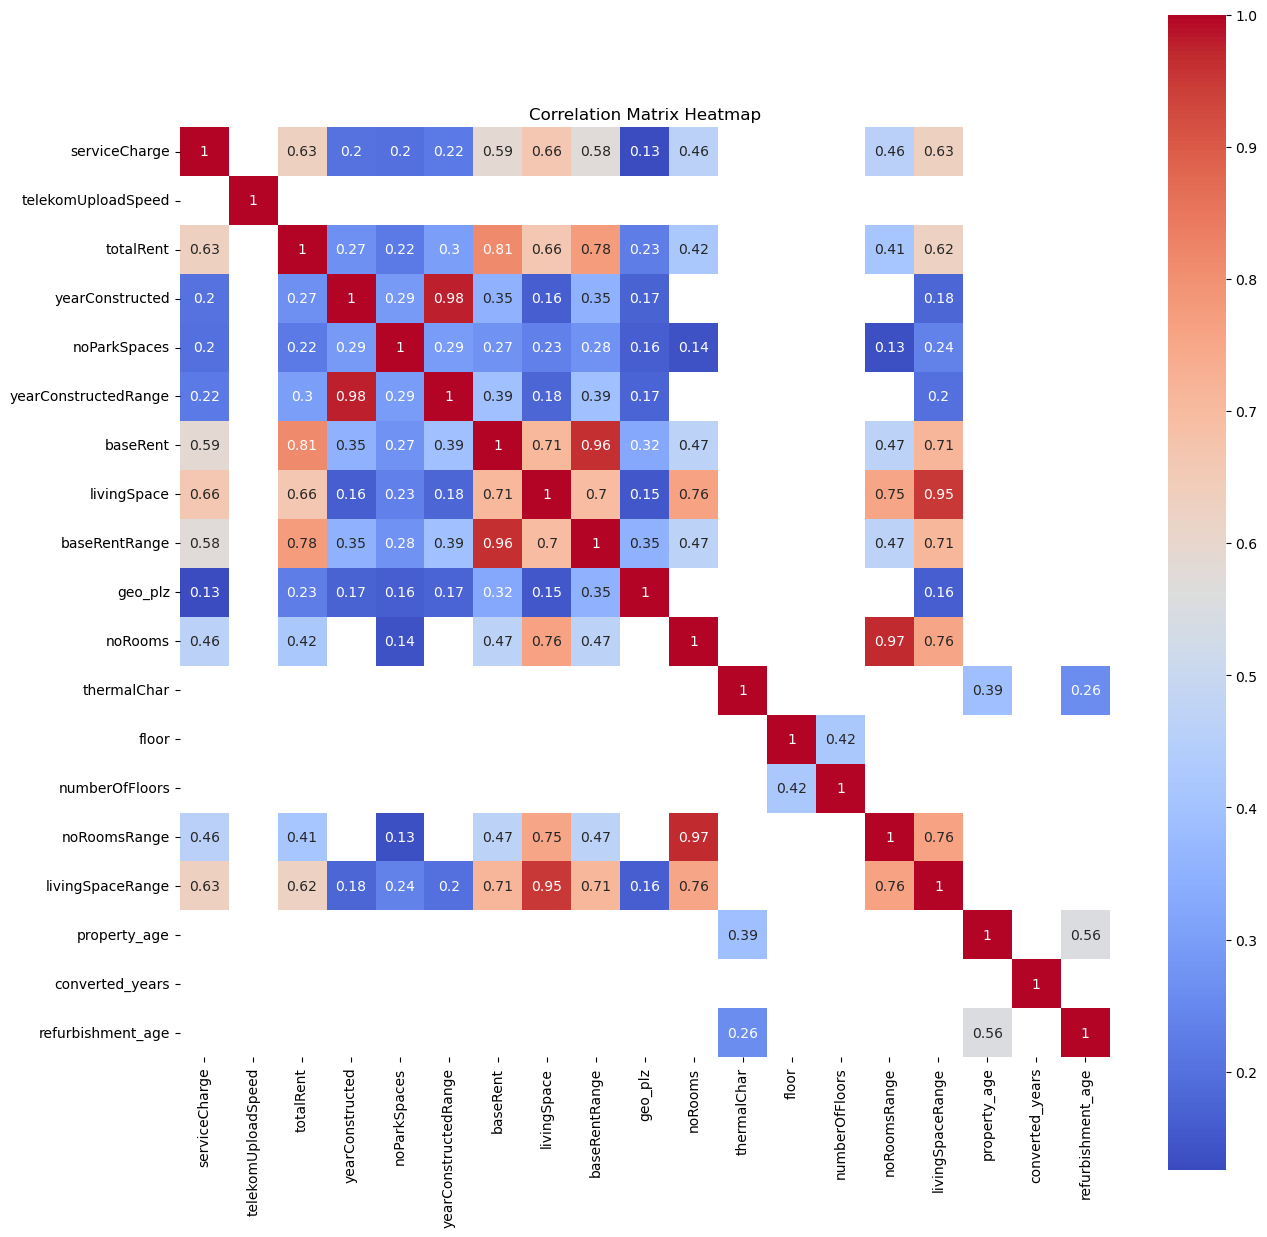

In [65]:
# correlation matrox of df_num
correlation_matrix=df_numerical.corr()

filtered_matrix = correlation_matrix.where(correlation_matrix > 0.1)

# Create a heatmap
plt.figure(figsize=(15, 15))  # Set the size of the plot
sns.heatmap(filtered_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
# plt.show()

# save the figure
plt.savefig('correlation_matrix.png')

In [66]:
df['geo_plz'].head()

0    44269
1    67459
2     1097
3     9599
4    28213
Name: geo_plz, dtype: int64

In [67]:
#choosing columns on the basis of the above
D= df[['noParkSpaces','livingSpaceRange','noRooms', 'totalRent', 'property_age']]

1. BaseRent, Baserentrange, TotalRent: They have a strong positive correlation dropping baserent before applying PCA .
2. Number of Rooms (noRooms) and No Room range: Using only one among them.
These are highly correlated. They may represent similar information, so PCA will likely group them into the same principal component.



In [68]:
# define dimensions of [X] matrix : number of variables
p = D.shape[1]

# define sample size of [X] : number of observations
n = D.shape[0]

# define values of matrix [X]
X = D.values

In [69]:
type(PCA())

fanalysis.pca.PCA

In [70]:
# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

# run PCA on X observed data
acp.fit(X)

PCA(col_labels=Index(['noParkSpaces', 'livingSpaceRange', 'noRooms', 'totalRent',
       'property_age'],
      dtype='object'),
    row_labels=Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       253963, 253964, 253965, 253966, 253967, 253968, 253969, 253970, 253971,
       253972],
      dtype='int64', length=253973))

In [71]:
acp.col_labels

Index(['noParkSpaces', 'livingSpaceRange', 'noRooms', 'totalRent',
       'property_age'],
      dtype='object')

In [72]:
acp.row_labels

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       253963, 253964, 253965, 253966, 253967, 253968, 253969, 253970, 253971,
       253972],
      dtype='int64', length=253973)

### Determine the number of factors

In [73]:
# print eigenvalues (the lambdas) - output includes proportion of variance explained and cumulated values thereof
print(acp.eig_)

[[  2.39026503   1.15742327   0.72814875   0.52743069   0.19673227]
 [ 47.80530061  23.14846533  14.56297503  10.54861372   3.9346453 ]
 [ 47.80530061  70.95376594  85.51674097  96.0653547  100.        ]]


In [74]:
type(acp.eig_), acp.eig_.shape

(numpy.ndarray, (3, 5))

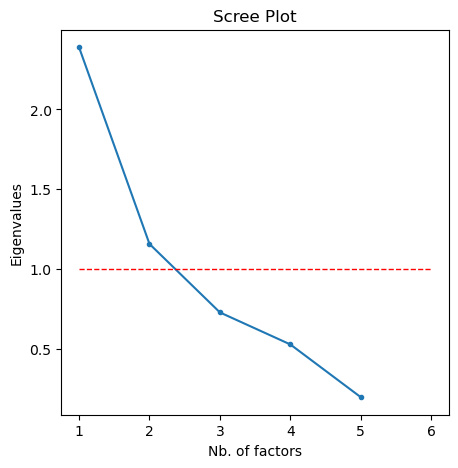

In [75]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,6],[1,1],"r--",linewidth=1)

plt.show()

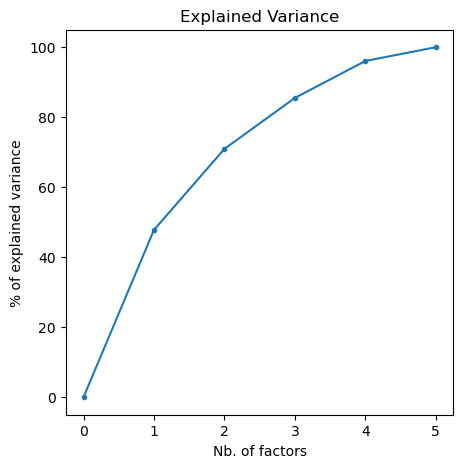

In [76]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [77]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 397538.158
p-value: 0.000


In [78]:
# Computing Karlis-Saporta-Spinaki threshold
# import math package
import math

# Karlis-Saporta-Spinaki cutpoint
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.008


In [79]:
(1/np.arange(p,0,-1)) , (1/np.arange(1,p+1,1))

(array([0.2       , 0.25      , 0.33333333, 0.5       , 1.        ]),
 array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ]))

thresholds for the broken sticks: [2.28333333 1.28333333 0.78333333 0.45       0.2       ]


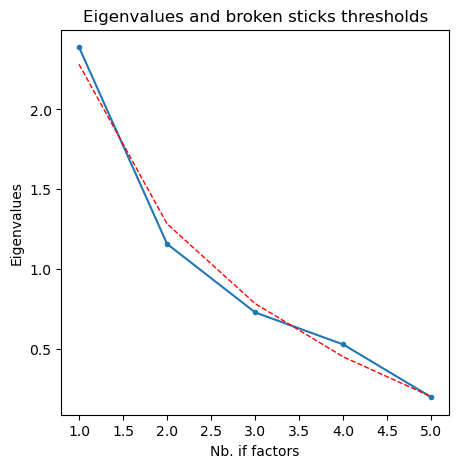

In [80]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

### Variables representation

In [81]:
# Correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:2],index=D.columns, columns=['F1','F2']))

                        F1        F2
noParkSpaces     -0.435831 -0.619483
livingSpaceRange -0.902984  0.249112
noRooms          -0.785865  0.418047
totalRent        -0.785920 -0.000015
property_age      0.386888  0.732696


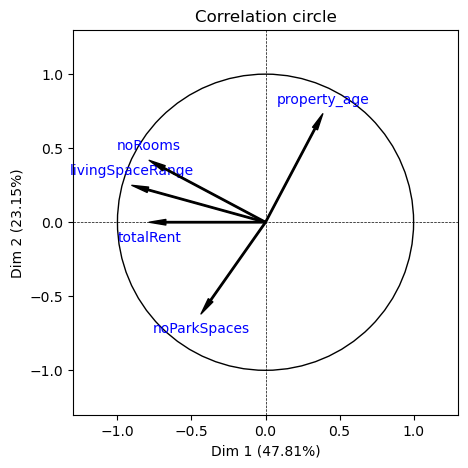

In [82]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))

Variables that are close together and point in the same direction (e.g., livingSpaceRange, noRooms) likely provide similar information. PCA helps combine them into fewer dimensions. These may collectively represent features internal factors related to the size of living spaces.

while variables close to dimension 2 noParkSpaces and Property_Age represents external factors.

Dimension 2 is primarily influenced by noParkSpaces and property_age.
This dimension might represent features related to parking availability or infrastructure.

In [83]:
# Cos² if the variables on the two first factors
print(pd.DataFrame(acp.col_cos2_[:,:2],index=D.columns, columns=['F1','F2']))

                        F1            F2
noParkSpaces      0.189949  3.837588e-01
livingSpaceRange  0.815381  6.205686e-02
noRooms           0.617583  1.747636e-01
totalRent         0.617670  2.246794e-10
property_age      0.149682  5.368440e-01


A higher Cos² value for a dimension indicates that the variable is better represented by that component.

Variables livingSpaceRange (0.812), noRooms (0.622) are strongly represented on the first principal component.

The variable property_age (0.538) and noParkSpaces (0.384) cast a dominating influence on the second principal component (F2).

In [84]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=D.columns, columns=['F1','F2']))

                         F1            F2
noParkSpaces       7.946777  3.315631e+01
livingSpaceRange  34.112575  5.361639e+00
noRooms           25.837443  1.509936e+01
totalRent         25.841051  1.941203e-08
property_age       6.262154  4.638269e+01


## Clustering

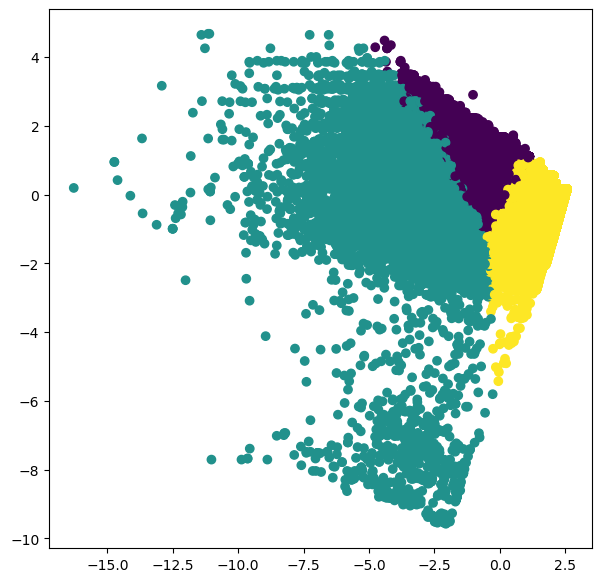

In [85]:
# Import K-means clustering
from sklearn.cluster import KMeans

# apply clustering to acp
kmeans = KMeans(init='k-means++', n_clusters=3, random_state=0).fit(acp.row_coord_)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(acp.row_coord_[:,0], acp.row_coord_[:,1], c=kmeans.labels_)

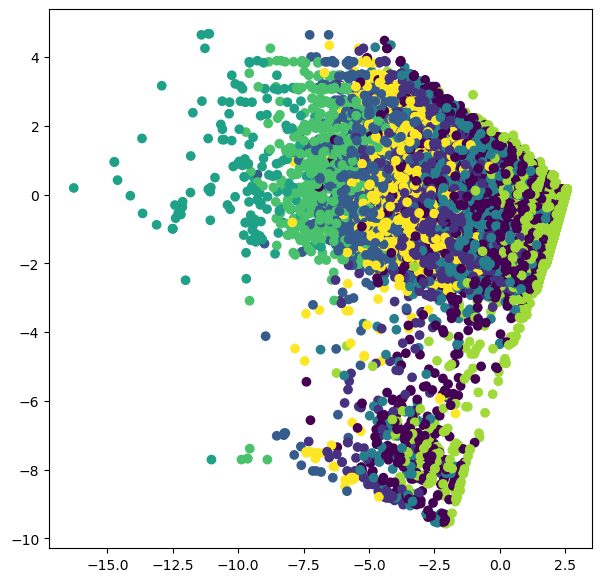

In [86]:
#  apply kmeans to X
kmeans1 = KMeans(init='k-means++', random_state=0).fit(X)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(acp.row_coord_[:,0], acp.row_coord_[:,1], c=kmeans1.labels_)

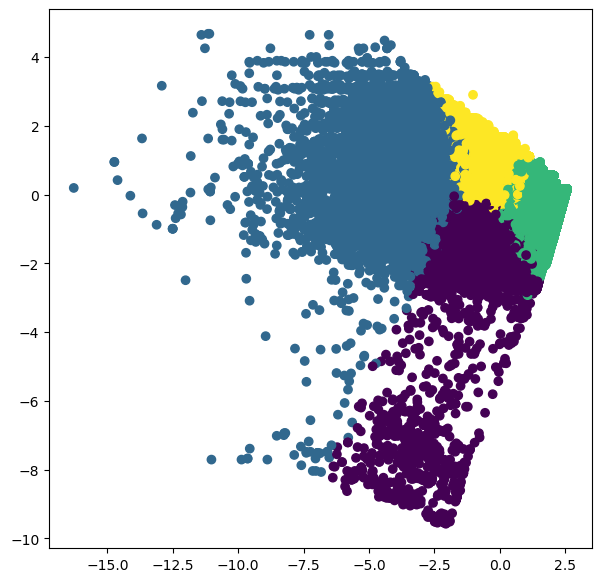

In [87]:
# inclreasing number of clusters to 4
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(acp.row_coord_)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(acp.row_coord_[:,0], acp.row_coord_[:,1], c=kmeans2.labels_)

1. Yellow Cluster: Likely represents a diverse range of properties with varying rental prices, living space, or parking availability.
2. Blue Cluster: May correspond to properties with lower rent or specific attributes, such as smaller living space or older buildings.
3. Green Cluster: Could signify properties with moderate features, such as mid-range rent, size, or parking availability.
4. Purple Cluster: Likely represents premium properties, such as newer buildings with higher rent and more parking availability.

In [88]:
# Silhoutte scores
from sklearn.metrics import silhouette_score

# Silhoutte score for kmeans above
score = silhouette_score(acp.row_coord_, kmeans2.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.259
